###1. Implement the following layers as python functions(both forward and backward propagation)	
* Inner-product layer
* Activation layer(Sigmoid or Rectified)
* Softmax layer

###2. Implement training and testing process
* included cross-validation

###3. Plot epoch-accuracy curves


In [10]:
from google.colab import drive
drive.mount('/content/drive')       

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
%cd /content/drive/MyDrive/Lab1 

/content/drive/MyDrive/Lab1


In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# load MNIST dataset 
image_size = 28           # width and length
no_of_different_labels = 10     #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size

train_data = np.loadtxt("mnist_train.csv", delimiter=",")                   
test_data = np.loadtxt("mnist_test.csv", delimiter=",")                    

# data preprocessing

# map pixels information from range(0, 255) to range(0.01, 1)
fac = 0.99 / 255
train_imgs = np.asfarray(train_data[:, 1:]) * fac + 0.01                  
test_imgs = np.asfarray(test_data[:, 1:]) * fac + 0.01                   

train_labels = np.asfarray(train_data[:, :1])                         
test_labels = np.asfarray(test_data[:, :1])                          

train_labels_for_prediction = train_labels[0:50000]
validation_labels_for_prediction = train_labels[50000:60000]

lr = np.arange(no_of_different_labels)

# transform labels into one hot representation
train_labels_one_hot = (lr==train_labels).astype(np.float64)                  # 60000*10 
test_labels_one_hot = (lr==test_labels).astype(np.float64)                   # 10000*10 

In [14]:
# Separate train_imgs, train_labels into training and validation
training_set = np.transpose(train_imgs[0:50000])                      # 784*50000 轉置
validation_set = np.transpose(train_imgs[50000:60000])                   # 784*10000 轉置

# Testing_set preprocess
testing_set = np.transpose(test_imgs)

# Separate train_labels_one_hot into training and validation
train_labels_one_hot_temp = train_labels_one_hot                         # 作暫存處理_切出training/testing set  
one_hot_train_lab_set = np.transpose(train_labels_one_hot_temp[0:50000])             # 10*50000 轉置
one_hot_validation_lab_set = np.transpose(train_labels_one_hot_temp[50000:60000])         # 10*10000 轉置

In [15]:
#innitial value setting
def main():
  global softmax_output

w1 = np.random.rand(10, 784)-0.5     
b1 = np.random.rand(10, 1)-0.5      
w2 = np.random.rand(10, 10)-0.5     
b2 = np.random.rand(10, 1)-0.5  
iteration = []              
accuracy = []
accuracy_val = []
loss_train = []           
loss_val = []

#layer definition
def InnerProduct_ForProp(x,W,b):
    y = np.matmul(W,x)+b
    return y

def InnerProduct_BackProp(dEdy,x,W):
    m, n = dEdy.shape
    x_t = np.transpose(x)
    dEdW = 1/n * np.matmul(dEdy, x_t)
    dEdb = 1/n * np.sum(dEdy)
    return dEdW,dEdb

def Softmax_ForProp(x):
    y = np.exp(x) / sum(np.exp(x))       
    return y

def Softmax_BackProp(softmax_output,one_hot_label_set):  # prediction - actual(correct) label--one_hot
    dEdx = softmax_output - one_hot_label_set
    return dEdx

def Sigmoid_ForProp(x):
    y = 1/(1+np.exp(-x))
    return y

def Sigmoid_BackProp(dEdy,x):
    return dEdx

def Rectified_ForProp(x):
    y=np.maximum(x,0)
    return y

def Rectified_BackProp(dZ2, Z1):
    w_t = np.transpose(w2)
    dEdx = np.matmul(w_t, dZ2) * Relu_deriv(Z1)
    return dEdx

def Relu_deriv(Z1):
    return Z1>0

def get_predictions(softmax_output):
    return np.argmax(softmax_output, 0)

def get_accuracy(predictions, label):
    print(predictions, label)
    accur = np.sum(predictions == label) / label.size
    accuracy.append(accur)
    return  (accur) 

def get_accuracy_val(predictions, label):
    print(predictions, label)
    accur = np.sum(predictions == label) / label.size
    accuracy_val.append(accur)
    return  (accur) 

def get_accuracy_test(predictions, label):
    print(predictions, label)
    accur = np.sum(predictions == label) / label.size
    return  (accur) 

def cross_entrophy_loss(ground_truth_one_hot, model_prediction_probability):                   
    m,n= ground_truth_one_hot.shape                    
    output = - np.sum(ground_truth_one_hot * np.log(model_prediction_probability)) / n
    return output

In [16]:
for i in range(2000):  

    ##↓ training_set  
    # Forward-propagation
    Z1 = InnerProduct_ForProp(training_set, w1, b1)     # Z1: layer1_linear_combination_output
    A1 = Rectified_ForProp(Z1)                 # A1: layer1_activation_function(ReLu)_output
    Z2 = InnerProduct_ForProp(A1, w2, b2)           # Z2: layer2_linear_combination_output
    softmax_output = Softmax_ForProp(Z2)            
    # Bakcward-propagation
    dZ2 = Softmax_BackProp(softmax_output, one_hot_train_lab_set)      # dZ2: partial differential softmax layer
    dw2, db2 = InnerProduct_BackProp(dZ2, A1, w2)           # dw2: differential of w2; db2: differential of b2
    dZ1 = Rectified_BackProp(dZ2, Z1)
    dw1, db1 = InnerProduct_BackProp(dZ1, training_set, w1)

    ##↓ validation_set
    # Forward-propagation
    Z1_val = InnerProduct_ForProp(validation_set, w1, b1)     
    A1_val = Rectified_ForProp(Z1_val)                 
    Z2_val = InnerProduct_ForProp(A1_val, w2, b2)           
    softmax_output_val = Softmax_ForProp(Z2_val)            
    # Bakcward-propagation
    dZ2_val = Softmax_BackProp(softmax_output_val, one_hot_validation_lab_set)      
    dw2_val, db2_val = InnerProduct_BackProp(dZ2_val, A1_val, w2)           
    dZ1_val = Rectified_BackProp(dZ2_val, Z1_val)
    dw1_val, db1_val = InnerProduct_BackProp(dZ1_val, validation_set, w1)   

    # Parameters Updating (Gradient descent)
    LR = 0.6                           # learning rate
    w1 = w1 - LR * dw1
    b1 = b1 - LR * db1
    w2 = w2 - LR * dw2
    b2 = b2 - LR * db2
    # Use validation data to evaluate model
    if i % 10 == 0:
      print("Iteration: ", i)
      iteration.append(i)
      iteration_count = len(iteration)
      predictions = get_predictions(softmax_output)             #get_prediction_of_training_set
      predictions_val = get_predictions(softmax_output_val)
      loss_of_train = cross_entrophy_loss(one_hot_train_lab_set, softmax_output)        #get_loss_of_training_set
      loss_train.append(loss_of_train)
      loss_of_val = cross_entrophy_loss(one_hot_validation_lab_set, softmax_output_val)   #get_loss_of_validation_set
      loss_val.append(loss_of_val)
      print("Training set accuracy is ", get_accuracy(predictions, train_labels_for_prediction.T,)) 
      print("Validation set accuracy is ", get_accuracy_val(predictions_val, validation_labels_for_prediction.T)) 
      print("Training set loss is ", loss_of_train)
      print("Validation set loss is ", loss_of_val)   

Iteration:  0
[8 6 8 ... 6 8 8] [[5. 0. 4. ... 8. 4. 8.]]
Training set accuracy is  0.1118
[8 8 8 ... 8 8 8] [[3. 8. 6. ... 5. 6. 8.]]
Validation set accuracy is  0.1194
Training set loss is  3.97032767268407
Validation set loss is  3.9569424978115517
Iteration:  10
[3 6 3 ... 3 5 8] [[5. 0. 4. ... 8. 4. 8.]]
Training set accuracy is  0.29388
[3 8 6 ... 8 5 5] [[3. 8. 6. ... 5. 6. 8.]]
Validation set accuracy is  0.3027
Training set loss is  1.9393460677882257
Validation set loss is  1.9192496701281176
Iteration:  20
[3 6 2 ... 3 4 8] [[5. 0. 4. ... 8. 4. 8.]]
Training set accuracy is  0.46662
[3 8 6 ... 8 5 8] [[3. 8. 6. ... 5. 6. 8.]]
Validation set accuracy is  0.4951
Training set loss is  1.4554413962645971
Validation set loss is  1.4164193488769292
Iteration:  30
[3 5 4 ... 3 4 8] [[5. 0. 4. ... 8. 4. 8.]]
Training set accuracy is  0.5598
[3 8 6 ... 5 6 8] [[3. 8. 6. ... 5. 6. 8.]]
Validation set accuracy is  0.5781
Training set loss is  1.2036661994814244
Validation set loss is  

In [17]:
# Using test_images and test_labels to do the final test
# forward propagation
Z1_test = InnerProduct_ForProp(testing_set, w1, b1)     
A1_test = Rectified_ForProp(Z1_test)                 
Z2_test = InnerProduct_ForProp(A1_test, w2, b2)           
softmax_output_test = Softmax_ForProp(Z2_test)

# prediction and get accuracy
predictions_test = get_predictions(softmax_output_test)  
print("Testing set accuracy is ", get_accuracy_test(predictions_test, test_labels.T)) 

[7 2 1 ... 4 5 6] [[7. 2. 1. ... 4. 5. 6.]]
Testing set accuracy is  0.9302


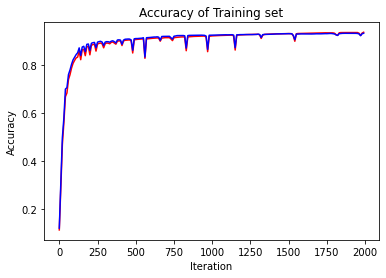

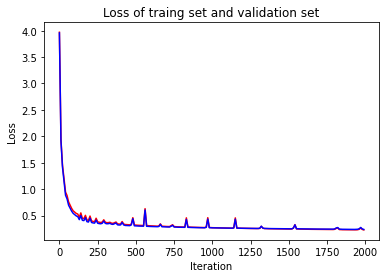

In [18]:
# plot accuracy and loss curves
plt.title("Accuracy of Training set")
plt.plot(iteration, accuracy, color="red")
plt.plot(iteration, accuracy_val, color="blue")
plt.ylabel("Accuracy")
plt,plt.xlabel("Iteration")
plt.show()  

plt.title("Loss of traing set and validation set")
plt.plot(iteration, loss_train, color="red", label="loss of training set")
plt.plot(iteration, loss_val, color="blue", label="loss of validation set")
plt.ylabel("Loss")
plt,plt.xlabel("Iteration")
plt.show()   